# Importing all the required packages

In [113]:
import os

In [114]:
import numpy as np
import pandas as pd

In [115]:
import re
import string

In [116]:
import nltk

In [117]:
from nltk.corpus import stopwords

In [118]:
from nltk import TweetTokenizer

In [119]:
from nltk.stem import WordNetLemmatizer

In [120]:
import gensim

In [121]:
import gensim.corpora as corpora

In [122]:
from gensim.utils import simple_preprocess

In [123]:
from gensim.models import CoherenceModel

In [124]:
import pyLDAvis

In [125]:
import pyLDAvis.gensim

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
import glob
import errno

# Reading the data from text documents 

In [128]:
ldata=[]
path = 'C:\\Users\\Butterfly\\Documents\\MiniProject\\*.txt'
files = glob.glob(path)
for name in files:
    try:
        with open(name,encoding='latin1') as f:
            ldata.append(f.readlines())#ldata.append
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [129]:
ldata

[['Alcohol: Its health and social impact in India\n',
  '\n',
  'Medicine and Society\n',
  'Alcohol: Its health and social impact in India\n',
  '\n',
  '\n',
  'ABSTRACT\n',
  'Alcoholic beverages have been used in human societies since the\n',
  'beginning of recorded history. The patterns of alcohol intake\n',
  'around the world are constantly evolving, and alcohol is\n',
  'ubiquitous today. Research has contributed substantially to our\n',
  'understanding of the relation of drinking to specific disorders,\n',
  'and has shown that the relation between alcohol consumption\n',
  'and health outcomes is complex and multidimensional. Increases\n',
  'in the average volume of drinking are predicted for the most\n',
  'populous regions of the world in Southeast Asia including India.\n',
  'Cultural differences apparently influence the pattern of alcohol\n',
  'consumption. In addition, alcohol is linked to categories of\n',
  'disease whose relative impact on the global burden is pre

In [130]:
flat_list = []
for sublist in ldata:
    for item in sublist:
        flat_list.append(item)

In [131]:
flat_list

['Alcohol: Its health and social impact in India\n',
 '\n',
 'Medicine and Society\n',
 'Alcohol: Its health and social impact in India\n',
 '\n',
 '\n',
 'ABSTRACT\n',
 'Alcoholic beverages have been used in human societies since the\n',
 'beginning of recorded history. The patterns of alcohol intake\n',
 'around the world are constantly evolving, and alcohol is\n',
 'ubiquitous today. Research has contributed substantially to our\n',
 'understanding of the relation of drinking to specific disorders,\n',
 'and has shown that the relation between alcohol consumption\n',
 'and health outcomes is complex and multidimensional. Increases\n',
 'in the average volume of drinking are predicted for the most\n',
 'populous regions of the world in Southeast Asia including India.\n',
 'Cultural differences apparently influence the pattern of alcohol\n',
 'consumption. In addition, alcohol is linked to categories of\n',
 'disease whose relative impact on the global burden is predicted\n',
 'to inc

# Preprocessing the text data and converting it into tf-idf vectore format

In [132]:
# Remove new line characters
data = [re.sub('\n','', sent) for sent in flat_list]
data

['Alcohol: Its health and social impact in India',
 '',
 'Medicine and Society',
 'Alcohol: Its health and social impact in India',
 '',
 '',
 'ABSTRACT',
 'Alcoholic beverages have been used in human societies since the',
 'beginning of recorded history. The patterns of alcohol intake',
 'around the world are constantly evolving, and alcohol is',
 'ubiquitous today. Research has contributed substantially to our',
 'understanding of the relation of drinking to specific disorders,',
 'and has shown that the relation between alcohol consumption',
 'and health outcomes is complex and multidimensional. Increases',
 'in the average volume of drinking are predicted for the most',
 'populous regions of the world in Southeast Asia including India.',
 'Cultural differences apparently influence the pattern of alcohol',
 'consumption. In addition, alcohol is linked to categories of',
 'disease whose relative impact on the global burden is predicted',
 'to increase. Therefore, it is appropriate to

In [133]:
#Removing special characters
data=[re.sub('[,\.!?]', '', sent) for sent in data]
data = [re.sub('\'', '', sent) for sent in data]
data=[re.sub('[^\w\s\.\al]','',sent) for sent in data]
data

<>:2: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-133-63eefcff0777>:2: DeprecationWarning: invalid escape sequence \.
  data=[re.sub('[,\.!?]', '', sent) for sent in data]
<ipython-input-133-63eefcff0777>:4: DeprecationWarning: invalid escape sequence \w
  data=[re.sub('[^\w\s\.\al]','',sent) for sent in data]


['Alcohol Its health and social impact in India',
 '',
 'Medicine and Society',
 'Alcohol Its health and social impact in India',
 '',
 '',
 'ABSTRACT',
 'Alcoholic beverages have been used in human societies since the',
 'beginning of recorded history The patterns of alcohol intake',
 'around the world are constantly evolving and alcohol is',
 'ubiquitous today Research has contributed substantially to our',
 'understanding of the relation of drinking to specific disorders',
 'and has shown that the relation between alcohol consumption',
 'and health outcomes is complex and multidimensional Increases',
 'in the average volume of drinking are predicted for the most',
 'populous regions of the world in Southeast Asia including India',
 'Cultural differences apparently influence the pattern of alcohol',
 'consumption In addition alcohol is linked to categories of',
 'disease whose relative impact on the global burden is predicted',
 'to increase Therefore it is appropriate to implement p

In [134]:
# Removing Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data

<>:2: DeprecationWarning: invalid escape sequence \S
<>:2: DeprecationWarning: invalid escape sequence \S
<>:2: DeprecationWarning: invalid escape sequence \S
<ipython-input-134-2dc3ba0e74db>:2: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]


['Alcohol Its health and social impact in India',
 '',
 'Medicine and Society',
 'Alcohol Its health and social impact in India',
 '',
 '',
 'ABSTRACT',
 'Alcoholic beverages have been used in human societies since the',
 'beginning of recorded history The patterns of alcohol intake',
 'around the world are constantly evolving and alcohol is',
 'ubiquitous today Research has contributed substantially to our',
 'understanding of the relation of drinking to specific disorders',
 'and has shown that the relation between alcohol consumption',
 'and health outcomes is complex and multidimensional Increases',
 'in the average volume of drinking are predicted for the most',
 'populous regions of the world in Southeast Asia including India',
 'Cultural differences apparently influence the pattern of alcohol',
 'consumption In addition alcohol is linked to categories of',
 'disease whose relative impact on the global burden is predicted',
 'to increase Therefore it is appropriate to implement p

In [135]:
# Removing single quotes
data = [x for x in data if x != ' ']
data

['Alcohol Its health and social impact in India',
 '',
 'Medicine and Society',
 'Alcohol Its health and social impact in India',
 '',
 '',
 'ABSTRACT',
 'Alcoholic beverages have been used in human societies since the',
 'beginning of recorded history The patterns of alcohol intake',
 'around the world are constantly evolving and alcohol is',
 'ubiquitous today Research has contributed substantially to our',
 'understanding of the relation of drinking to specific disorders',
 'and has shown that the relation between alcohol consumption',
 'and health outcomes is complex and multidimensional Increases',
 'in the average volume of drinking are predicted for the most',
 'populous regions of the world in Southeast Asia including India',
 'Cultural differences apparently influence the pattern of alcohol',
 'consumption In addition alcohol is linked to categories of',
 'disease whose relative impact on the global burden is predicted',
 'to increase Therefore it is appropriate to implement p

In [136]:
#Removing numbers
data=[re.sub(r'\d+','',sent) for sent in data]
data

['Alcohol Its health and social impact in India',
 '',
 'Medicine and Society',
 'Alcohol Its health and social impact in India',
 '',
 '',
 'ABSTRACT',
 'Alcoholic beverages have been used in human societies since the',
 'beginning of recorded history The patterns of alcohol intake',
 'around the world are constantly evolving and alcohol is',
 'ubiquitous today Research has contributed substantially to our',
 'understanding of the relation of drinking to specific disorders',
 'and has shown that the relation between alcohol consumption',
 'and health outcomes is complex and multidimensional Increases',
 'in the average volume of drinking are predicted for the most',
 'populous regions of the world in Southeast Asia including India',
 'Cultural differences apparently influence the pattern of alcohol',
 'consumption In addition alcohol is linked to categories of',
 'disease whose relative impact on the global burden is predicted',
 'to increase Therefore it is appropriate to implement p

In [137]:
# print(data)

In [138]:
val = '.'.join(data)

In [139]:
#Coverting to lower case
val=val.lower()
val

'alcohol its health and social impact in india..medicine and society.alcohol its health and social impact in india...abstract.alcoholic beverages have been used in human societies since the.beginning of recorded history the patterns of alcohol intake.around the world are constantly evolving and alcohol is.ubiquitous today research has contributed substantially to our.understanding of the relation of drinking to specific disorders.and has shown that the relation between alcohol consumption.and health outcomes is complex and multidimensional increases.in the average volume of drinking are predicted for the most.populous regions of the world in southeast asia including india.cultural differences apparently influence the pattern of alcohol.consumption in addition alcohol is linked to categories of.disease whose relative impact on the global burden is predicted.to increase therefore it is appropriate to implement policies.with targeted harm reduction strategies the crucial need from.a publi

In [140]:
#removing non english words
import nltk
words = set(nltk.corpus.words.words())
val=" ".join(w for w in nltk.wordpunct_tokenize(val) \
         if w.lower() in words or not w.isalpha())

In [141]:
#Removing stop words
stopwords_punct = set(stopwords.words('english')).union(string.punctuation).union('-')

sentences = nltk.sent_tokenize(val)

sents_stopwords_rm = []

for sent in sentences:
    sents_stopwords_rm.append(' '.join(w for w in nltk.word_tokenize(sent) if w.lower() not in stopwords_punct))

data_tokens_no_stopwords = [nltk.word_tokenize(t) for t in sents_stopwords_rm]
data_tokens_no_stopwords

[['alcohol', 'health', 'social', 'impact', '..', 'medicine', 'society'],
 ['alcohol', 'health', 'social', 'impact', '...', 'abstract'],
 ['alcoholic', 'used', 'human', 'since'],
 ['beginning', 'history', 'alcohol', 'intake'],
 ['around', 'world', 'constantly', 'alcohol'],
 ['ubiquitous', 'today', 'research', 'substantially'],
 ['understanding', 'relation', 'drinking', 'specific'],
 ['shown', 'relation', 'alcohol', 'consumption'],
 ['health', 'complex', 'multidimensional'],
 ['average', 'volume', 'drinking'],
 ['populous', 'world', 'southeast'],
 ['cultural', 'apparently', 'influence', 'pattern', 'alcohol'],
 ['consumption', 'addition', 'alcohol', 'linked'],
 ['disease', 'whose', 'relative', 'impact', 'global', 'burden'],
 ['increase', 'therefore', 'appropriate', 'implement'],
 ['targeted', 'harm', 'reduction', 'crucial', 'need'],
 ['public', 'health', 'perspective', 'regular'],
 ['whereby', 'prevention', 'taken', 'fully'],
 ['account', 'policy', 'alcohol', 'control'],
 ['regulation', '

In [142]:
#Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
data_lemmatized = []
for w in data_tokens_no_stopwords:
    data_lemmatized.append([word for word in map(wordnet_lemmatizer.lemmatize, w)])
data_lemmatized

[['alcohol', 'health', 'social', 'impact', '..', 'medicine', 'society'],
 ['alcohol', 'health', 'social', 'impact', '...', 'abstract'],
 ['alcoholic', 'used', 'human', 'since'],
 ['beginning', 'history', 'alcohol', 'intake'],
 ['around', 'world', 'constantly', 'alcohol'],
 ['ubiquitous', 'today', 'research', 'substantially'],
 ['understanding', 'relation', 'drinking', 'specific'],
 ['shown', 'relation', 'alcohol', 'consumption'],
 ['health', 'complex', 'multidimensional'],
 ['average', 'volume', 'drinking'],
 ['populous', 'world', 'southeast'],
 ['cultural', 'apparently', 'influence', 'pattern', 'alcohol'],
 ['consumption', 'addition', 'alcohol', 'linked'],
 ['disease', 'whose', 'relative', 'impact', 'global', 'burden'],
 ['increase', 'therefore', 'appropriate', 'implement'],
 ['targeted', 'harm', 'reduction', 'crucial', 'need'],
 ['public', 'health', 'perspective', 'regular'],
 ['whereby', 'prevention', 'taken', 'fully'],
 ['account', 'policy', 'alcohol', 'control'],
 ['regulation', '

In [143]:
word_list = []
for sublist in data_lemmatized:
    for item in sublist:
        word_list.append(item)
words=" ".join(word_list)

In [144]:
words

'alcohol health social impact .. medicine society alcohol health social impact ... abstract alcoholic used human since beginning history alcohol intake around world constantly alcohol ubiquitous today research substantially understanding relation drinking specific shown relation alcohol consumption health complex multidimensional average volume drinking populous world southeast cultural apparently influence pattern alcohol consumption addition alcohol linked disease whose relative impact global burden increase therefore appropriate implement targeted harm reduction crucial need public health perspective regular whereby prevention taken fully account policy alcohol control regulation market alcoholic j introduction alcohol tobacco important global demand experienced rapid increase per consumption growth subcontinent per pure alcohol consumption alcoholic engender familiar human since beginning history near ubiquity alcoholic human history appreciation social health drinking whether chin

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [146]:
freq = pd.Series(words.split()).value_counts()[:50]
freq

alcohol        472
..             353
brain          277
al             262
consumption    188
disease        143
drinking       143
effect         132
risk            89
use             83
alcoholism      76
may             71
associated      67
health          66
alcoholic       63
also            61
liver           56
author          54
manuscript      54
however         49
...             48
found           48
ie              46
research        44
different       43
people          42
injury          42
among           41
memory          41
one             39
see             39
per             39
matter          36
blood           36
overall         35
damage          35
important       34
although        34
men             34
global          33
cognitive       33
social          32
burden          32
chronic         32
volume          31
white           31
study           31
figure          31
evidence        30
control         30
dtype: int64

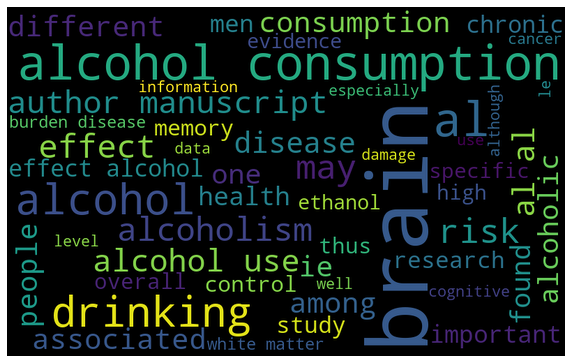

In [147]:
#Plotting a word cloud for most frequent words
processed_data = words
wordcloud = WordCloud(width=800, height=500, background_color = 'black', max_words=50,max_font_size=120).generate(processed_data)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="lanczos")
plt.axis('off')
plt.show()

In [148]:
dictionary = corpora.Dictionary(data_lemmatized)


In [149]:
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1)], [(1, 1), (13, 1), (14, 1), (15, 1)], [(1, 1), (16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1)], [(1, 1), (24, 1), (27, 1), (28, 1)], [(2, 1), (29, 1), (30, 1)], [(23, 1), (31, 1), (32, 1)], [(18, 1), (33, 1), (34, 1)], [(1, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(1, 1), (27, 1), (39, 1), (40, 1)], [(3, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(46, 1), (47, 1), (48, 1), (49, 1)], [(50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(2, 1), (55, 1), (56, 1), (57, 1)], [(58, 1), (59, 1), (60, 1), (61, 1)], [(1, 1), (62, 1), (63, 1), (64, 1)], [(9, 1), (65, 1), (66, 1)], [(67, 1)], [(68, 1)], [(1, 1), (43, 1), (48, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(27, 1), (75, 1)], [(1, 1), (72, 1), (76, 1), (77, 1)], [(27, 1)], [(9, 1), (78, 1)], [(10, 1), (11, 1), (13, 1),

In [150]:
# print(id2word[id])

In [151]:
id2word=dictionary

In [152]:
id2word

# Building an LDA model

In [153]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('..', 1),
  ('alcohol', 1),
  ('health', 1),
  ('impact', 1),
  ('medicine', 1),
  ('social', 1),
  ('society', 1)]]

In [154]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [155]:
ldamodel.print_topics()

[(0,
  '0.031*"brain" + 0.022*"alcohol" + 0.016*"use" + 0.016*"associated" + 0.011*"control" + 0.010*"result" + 0.010*"hemisphere" + 0.009*"drinking" + 0.008*"alcoholic" + 0.008*"function"'),
 (1,
  '0.062*".." + 0.038*"disease" + 0.034*"alcohol" + 0.021*"drinking" + 0.021*"effect" + 0.018*"consumption" + 0.016*"brain" + 0.016*"health" + 0.016*"manuscript" + 0.016*"author"'),
 (2,
  '0.040*".." + 0.015*"research" + 0.012*"brain" + 0.012*"alcoholism" + 0.012*"risk" + 0.012*"also" + 0.010*"behavioral" + 0.009*"system" + 0.009*"influence" + 0.008*"behavior"'),
 (3,
  '0.079*"al" + 0.014*"matter" + 0.012*"brain" + 0.012*"cognitive" + 0.011*"see" + 0.011*"memory" + 0.011*".." + 0.011*"white" + 0.011*"functional" + 0.010*"ie"'),
 (4,
  '0.085*"alcohol" + 0.039*"brain" + 0.035*"consumption" + 0.021*"effect" + 0.018*"alcoholism" + 0.014*"use" + 0.011*".." + 0.011*"al" + 0.011*"per" + 0.010*"associated"')]

In [156]:
print('Perplexity: ', ldamodel.log_perplexity(corpus))

Perplexity:  -7.150052533281454


In [157]:
pyLDAvis.enable_notebook()
plot=pyLDAvis.gensim.prepare(ldamodel, corpus, id2word)
pyLDAvis.show(plot)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [18/Dec/2019 19:40:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2019 19:40:45] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2019 19:40:45] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2019 19:40:45] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


In [158]:
def format_topics_sentences(ldamodel=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    
    sent_topics_df = pd.concat([sent_topics_df], axis=1)
    return(sent_topics_df)

In [159]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus)


In [160]:

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']


In [ ]:
# Show
df_dominant_topic.head(3)